# EDA Comparisons
Let's evaluate data comparisons

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
df = pd.read_csv('terry-clean.csv')
df.head()

,subject_age_group,subject_id,go_/_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,reported_time,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,36 - 45,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,None,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,18 - 25,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,None,NaN,N,N,-,-,-
2,1 - 17,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,...,01:06:00,-,-,None,WEST PCT 3RD W - MARY,N,N,-,-,-
3,1 - 17,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,...,19:27:00,-,-,None,NORTH PCT 2ND W - NORA,N,N,-,-,-
4,26 - 35,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,...,19:32:00,-,-,None,NORTH PCT 2ND W - NORA,N,N,-,-,-


In [52]:
df = df.replace('Gender Diverse (gender non-conforming and/or transgender)', 'Gender Diverse')

In [5]:
data = pd.read_csv('terry-cat-dummies.csv')
data.head()

,frisk_flag_-,frisk_flag_N,frisk_flag_Y,call_type_911,call_type_None,call_type_ONVIEW,call_type_Other,subject_age_group_1 - 17,subject_age_group_18 - 25,subject_age_group_26 - 35,...,subject_perceived_race_American Indian or Alaska Native,subject_perceived_race_Asian,subject_perceived_race_Black or African American,subject_perceived_race_Hispanic,subject_perceived_race_Multi-Racial,subject_perceived_race_Native Hawaiian or Other Pacific Islander,subject_perceived_race_Other,subject_perceived_race_Unknown,subject_perceived_race_White,reported_time
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,3
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,3


In [18]:
df['arrest_01'] = df.arrest_flag.replace('N', 0).replace('Y', 1)

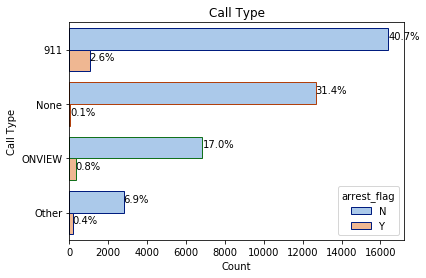

In [19]:
ax = sns.countplot(y='call_type', data=df, hue='arrest_flag',edgecolor=sns.color_palette("dark", 3), palette='pastel',
              order = df['call_type'].value_counts().index);
total = len(df['call_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
title = 'call_type'.replace('_', ' ').title()
plt.title(title)
plt.ylabel(title)
plt.xlabel('Count')
plt.show()

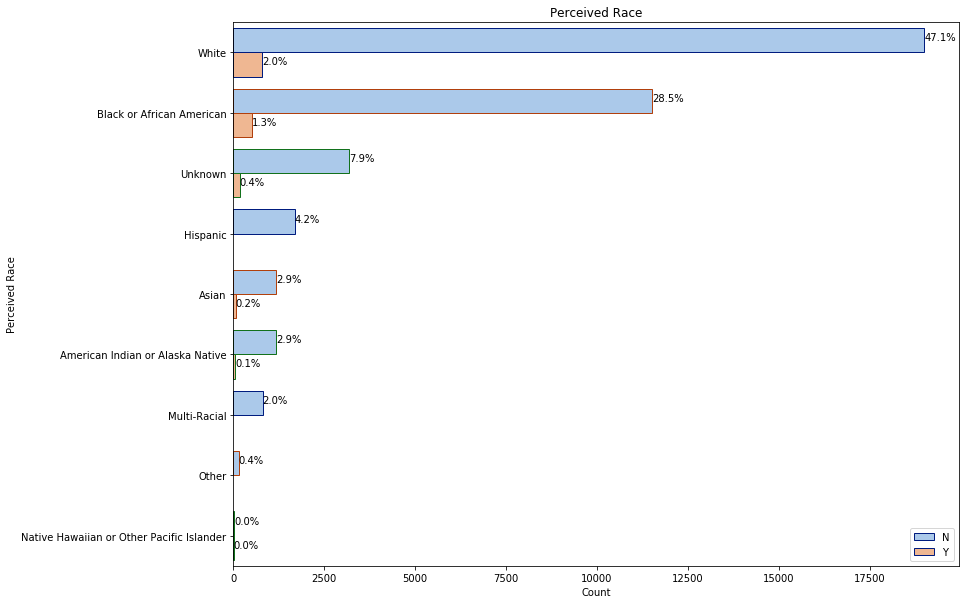

In [27]:
plt.figure(figsize=(13, 10))
ax = sns.countplot(y='subject_perceived_race', data=df, hue='arrest_flag',edgecolor=sns.color_palette("dark", 3), 
                   palette='pastel', order = df['subject_perceived_race'].value_counts().index);
total = len(df['subject_perceived_race'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
ax.legend(loc='lower right')
title = 'perceived_race'.replace('_', ' ').title()
plt.title(title)
plt.ylabel(title)
plt.xlabel('Count')
plt.show()

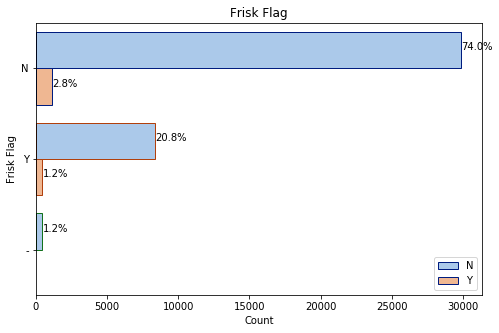

In [31]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y='frisk_flag', data=df, hue='arrest_flag',edgecolor=sns.color_palette("dark", 3), 
                   palette='pastel', order = df['frisk_flag'].value_counts().index);
total = len(df['frisk_flag'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
ax.legend(loc='lower right')
title = 'frisk_flag'.replace('_', ' ').title()
plt.title(title)
plt.ylabel(title)
plt.xlabel('Count')
plt.show()

In [53]:
arrested = df[df['arrest_flag'] == 'Y']
arrested

,subject_age_group,subject_id,go_/_sc_num,terry_stop_id,stop_resolution,weapon_type,officer_id,officer_yob,officer_gender,officer_race,...,initial_call_type,final_call_type,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat,arrest_01
1157,1 - 17,8273276997,20190000204158,8273686053,Arrest,None,7428,1963,M,Hispanic or Latino,...,WARRANT - FELONY PICKUP,--WARRANT SERVICES - FELONY,ONVIEW,WEST PCT OPS - CPT,Y,N,West,M,M3,1
1169,26 - 35,8355337122,20190000229094,8355333909,Arrest,None,8623,1991,M,White,...,ASLT - IP/JO - WITH OR W/O WPNS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 3RD W - K/Q RELIEF,Y,N,West,Q,Q2,1
1173,26 - 35,8926195570,20190000279716,8927975747,Arrest,Other,7797,1986,M,White,...,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--ASSAULTS - HARASSMENT, THREATS",911,WEST PCT 3RD W - KING,Y,Y,West,K,K1,1
1186,36 - 45,8613729887,20190000257632,8613721148,Arrest,None,8608,1994,M,Hispanic or Latino,...,HELP THE OFFICER,--ASSAULTS - FIREARM INVOLVED,911,WEST PCT 3RD W - QUEEN,Y,Y,-,-,-,1
1188,36 - 45,9007238661,20190000281067,9007034032,Arrest,None,8587,1992,M,Asian,...,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),911,NORTH PCT 3RD W - LINCOLN,Y,N,North,L,L2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40289,56 and Above,12248459262,20200000031420,12248474534,Arrest,None,8636,1989,M,Two or More Races,...,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),"--ASSAULTS, OTHER",911,WEST PCT 1ST W - DAVID/MARY,Y,N,West,M,M3,1
40291,56 and Above,12634426429,20200000068784,12634415415,Arrest,None,8458,1983,M,White,...,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)",--BURGLARY - NON RESIDENTIAL/COMMERCIAL,Other,EAST PCT 1ST W - E/G RELIEF (CHARLIE),Y,N,East,G,G2,1
40299,56 and Above,9587645130,20190000288157,9587776187,Arrest,None,8601,1994,F,Two or More Races,...,"WEAPN-IP/JO-GUN,DEADLY WPN (NO THRT/ASLT/DIST)","--WEAPON,PERSON WITH - OTHER WEAPON",911,EAST PCT 3RD WATCH - CHARLIE RELIEF,Y,Y,East,E,E3,1
40302,56 and Above,10076866529,20190000329876,10104103280,Arrest,None,8609,1997,M,Two or More Races,...,ASLT - WITH OR W/O WEAPONS (NO SHOOTINGS),--CRISIS COMPLAINT - GENERAL,911,EAST PCT 1ST W - GEORGE (CHARLIE),Y,N,East,E,E3,1


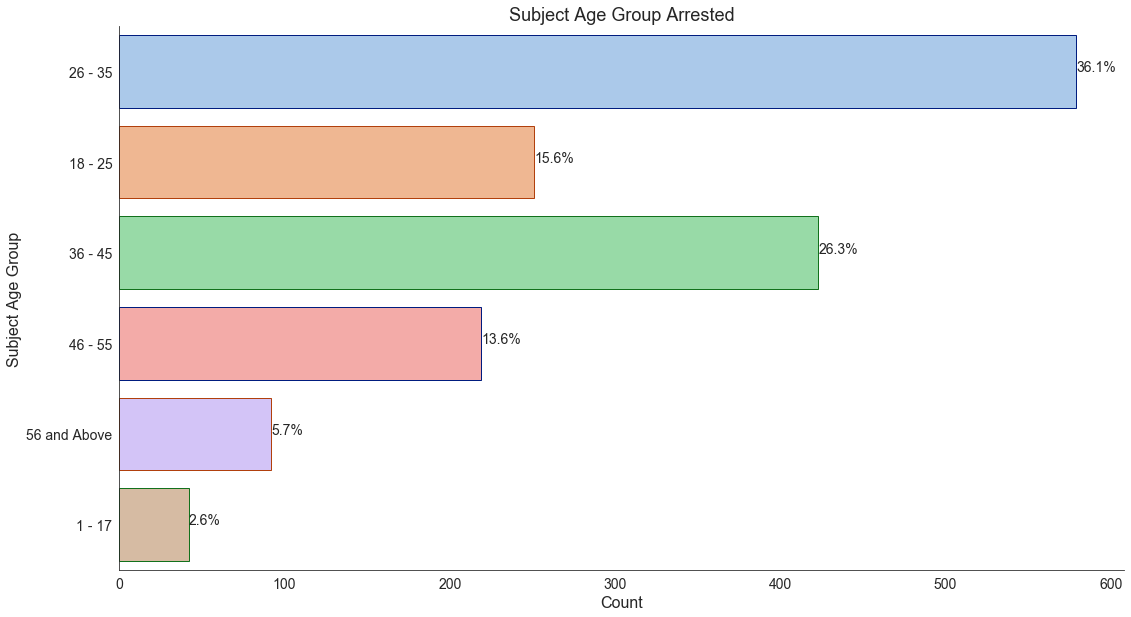

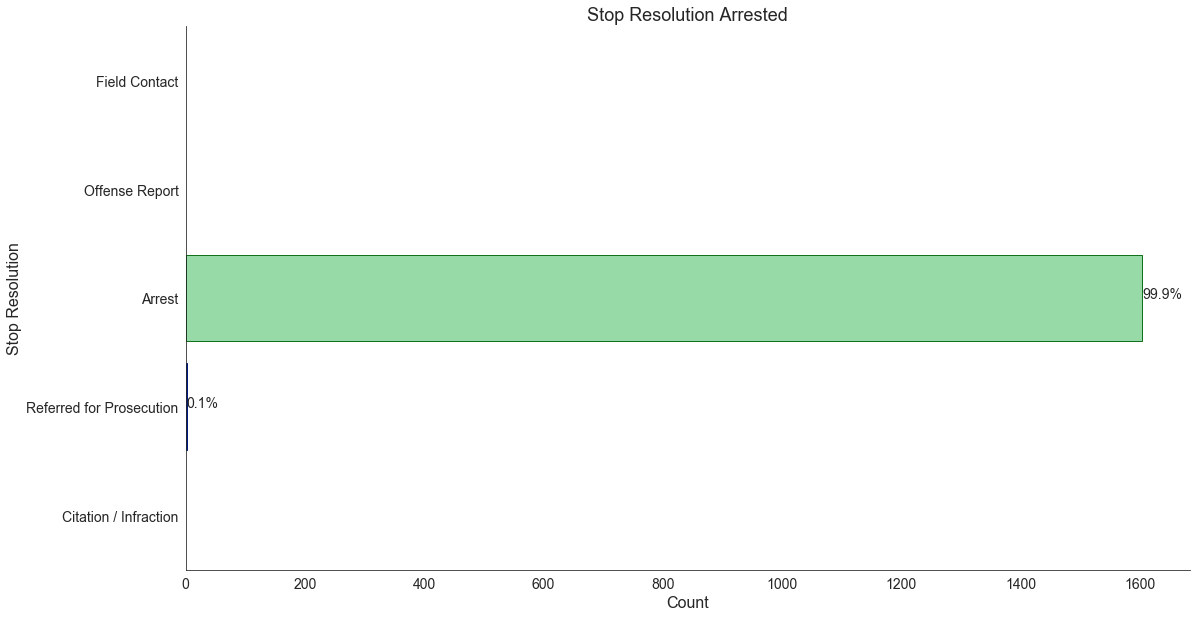

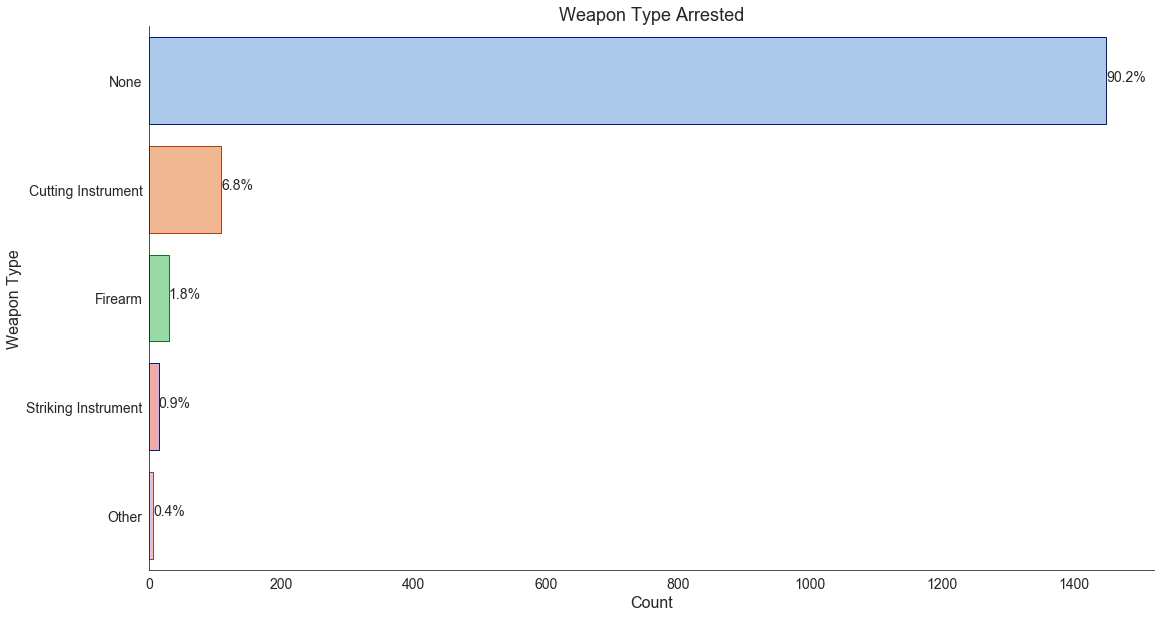

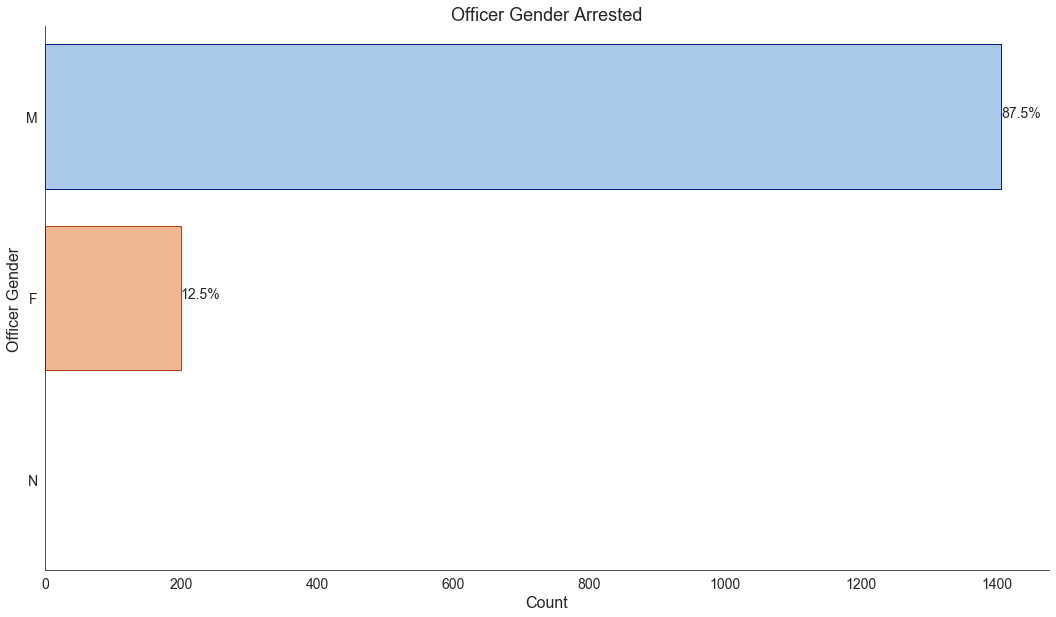

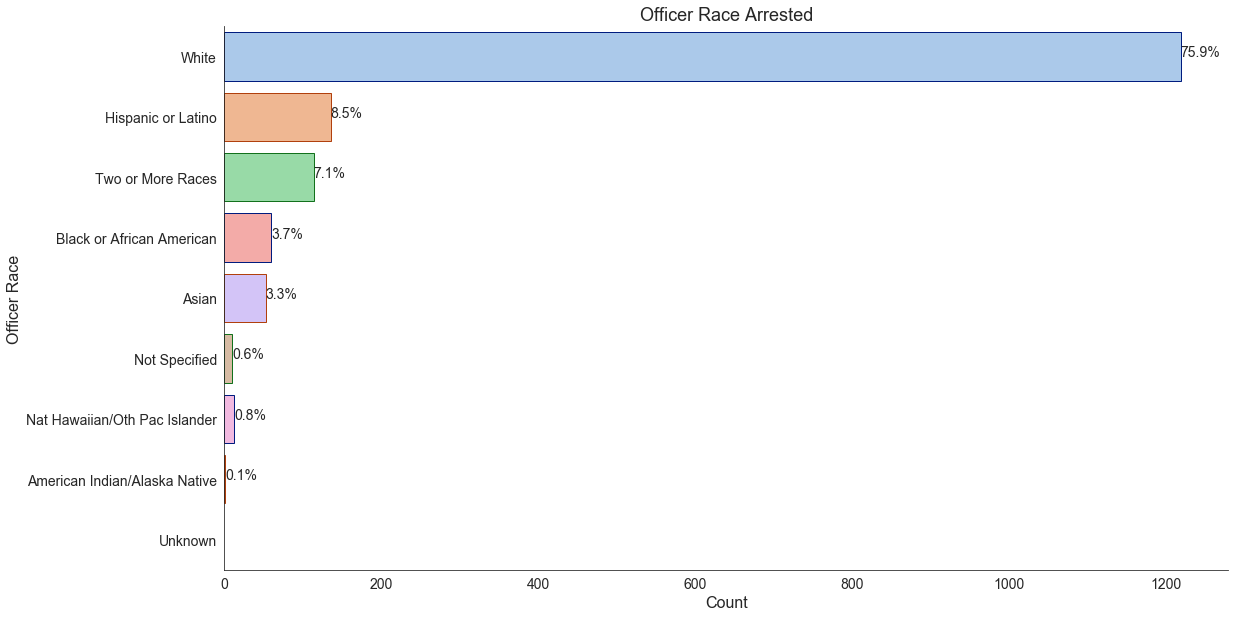

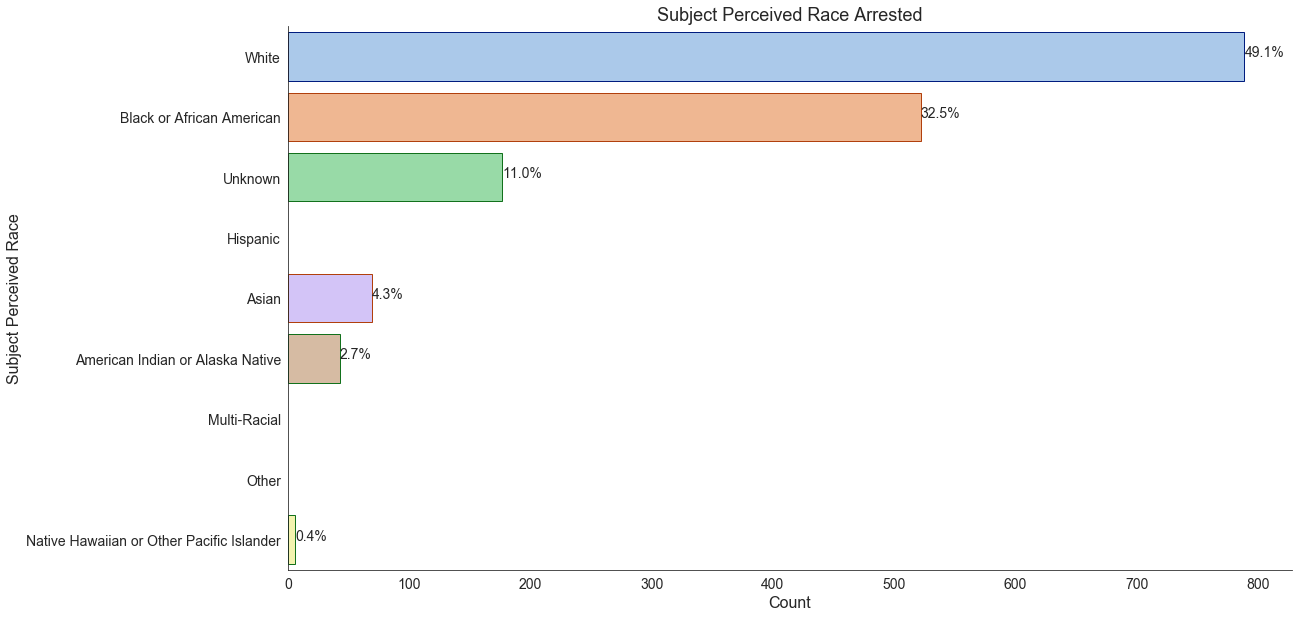

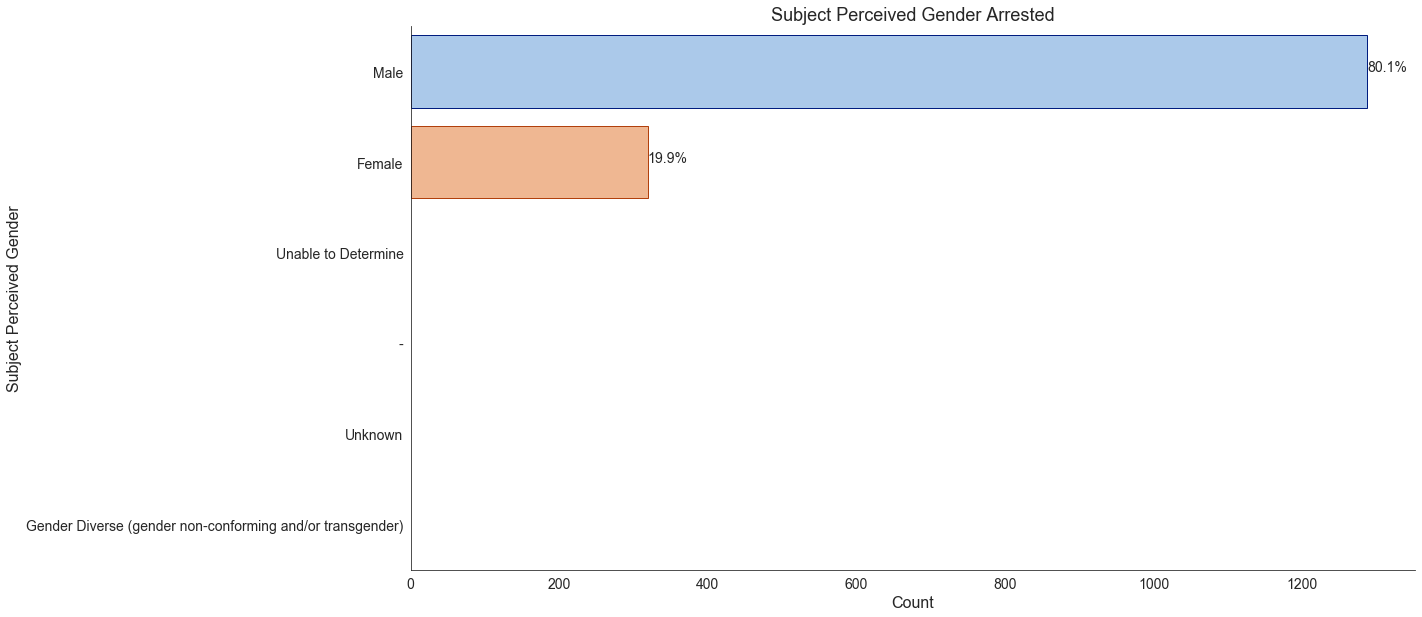

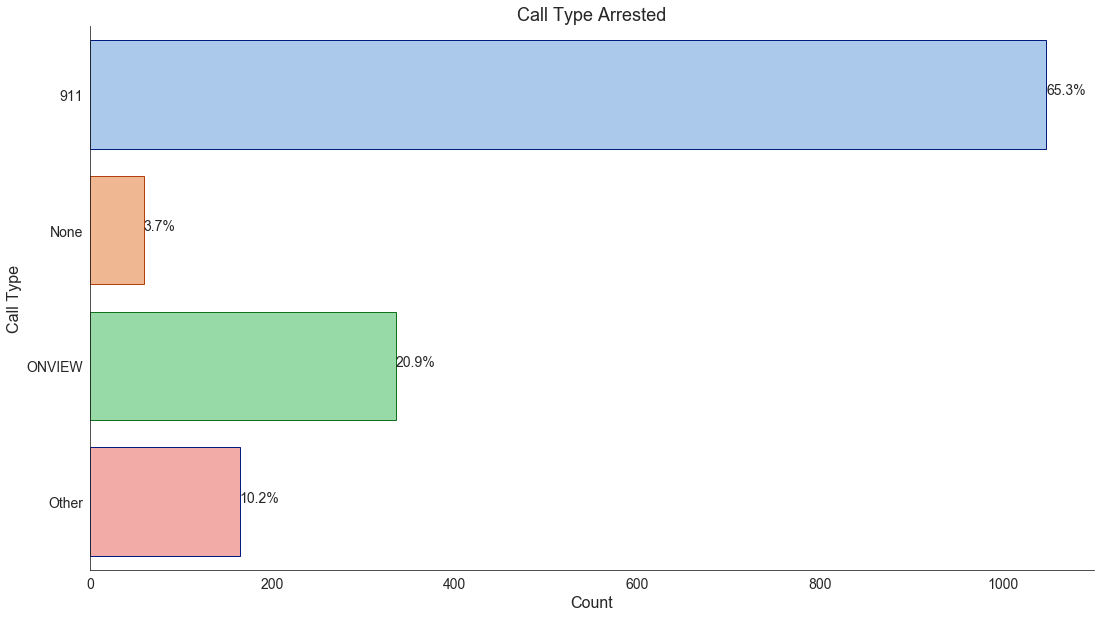

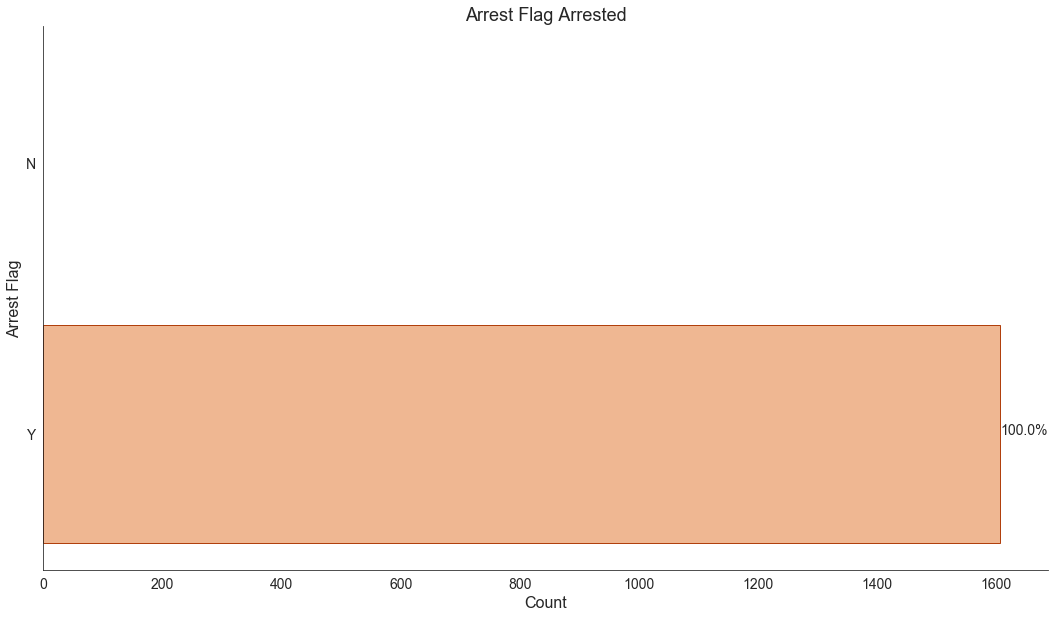

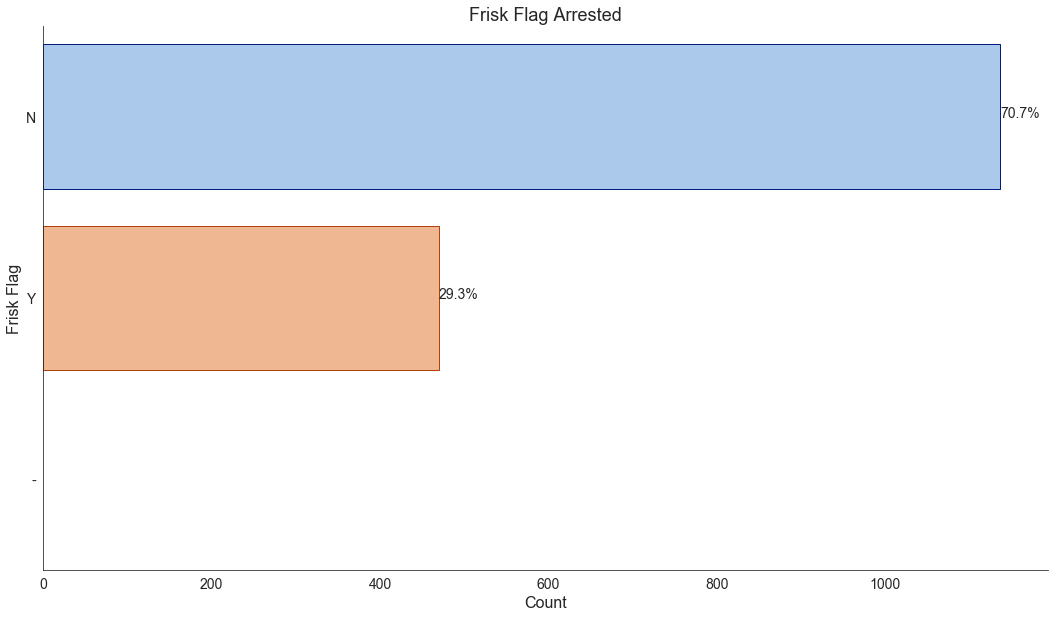

KeyError: 'arrest_01'

In [82]:
for col in arrested.drop(columns=['go_/_sc_num', 'terry_stop_id', 'officer_id', 'subject_id', 'reported_date',
                                  'officer_squad', 'officer_yob', 'precinct', 'sector', 'beat', 'final_call_type', 
                                  'initial_call_type', 'reported_time']).columns:
    ax = sns.countplot(y=col, data=arrested, edgecolor=sns.color_palette("dark", 3), palette='pastel',
                       order = df[col].value_counts().index);
    sns.despine(left=False)
    
    total = len(arrested[col])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=14)
    title = col.replace('_', ' ').title()
    plt.title(title + ' Arrested', fontsize=18)
    plt.ylabel(title, fontsize=16)
    plt.xlabel('Count', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

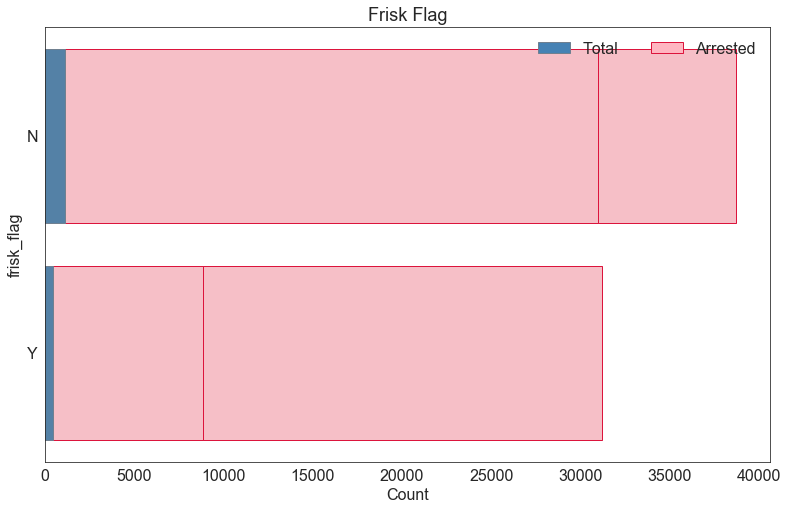

In [87]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (13, 8)})
sns.despine(left=False)

for col in df.drop(columns=['go_/_sc_num', 'terry_stop_id', 'officer_id', 'subject_id', 'reported_date',
                            'officer_squad', 'officer_yob', 'precinct', 'sector', 'beat', 'final_call_type', 
                            'initial_call_type', 'reported_time']).columns:
    #Plot 1 - background - "total" (top) series
    sns.countplot(y = df[col], color="lightpink", edgecolor='crimson')

    #Plot 2 - overlay - "bottom" series
    bottom_plot = sns.countplot(y = arrested[col], color="steelblue", edgecolor='slategrey')

    topbar = plt.Rectangle((0,0),1,1, fc="lightpink", edgecolor='crimson')
    bottombar = plt.Rectangle((0,0),1,1, fc='steelblue',  edgecolor='slategrey')
    l = plt.legend([bottombar, topbar], ['Total', 'Arrested'], loc=1, ncol = 2, prop={'size':16})
    l.draw_frame(False)

    bottom_plot.set_ylabel(col)
    bottom_plot.set_xlabel("Count")
    title = col.replace('_', ' ').title()
    plt.title(title, fontsize=18)

    #Set fonts to consistent 16pt size
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(16)

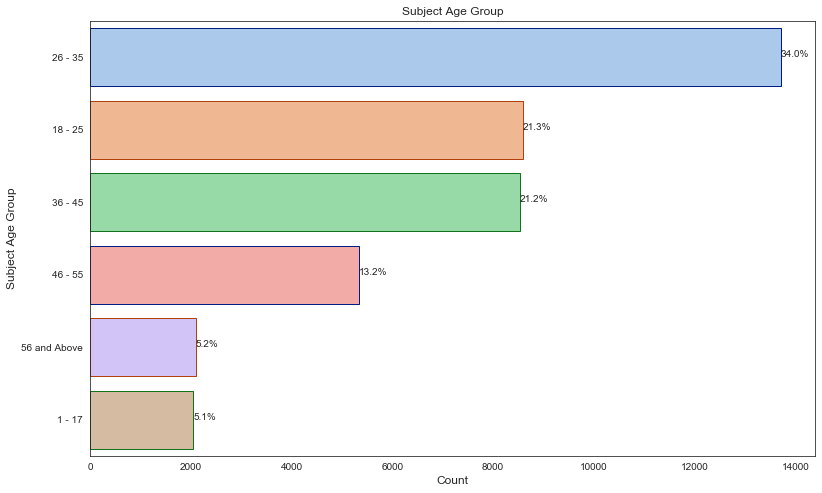

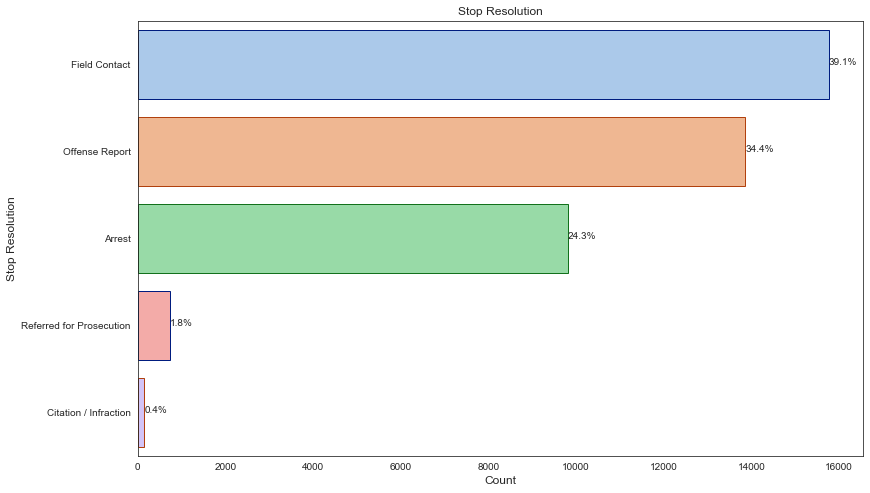

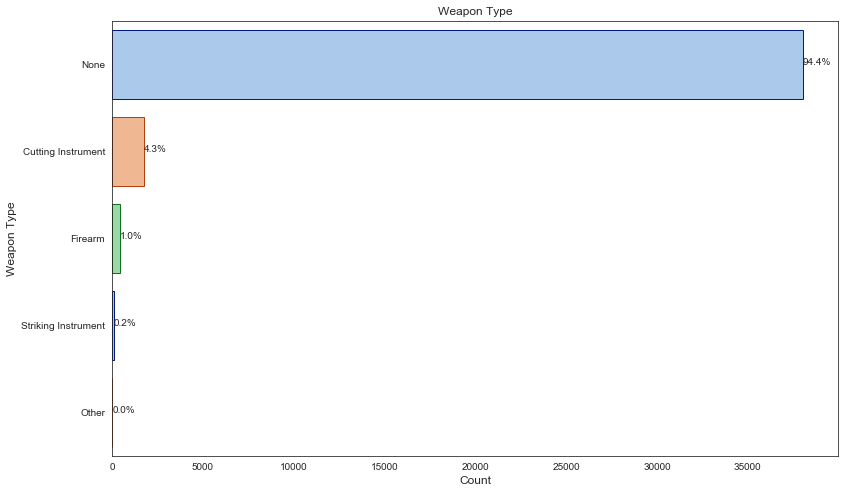

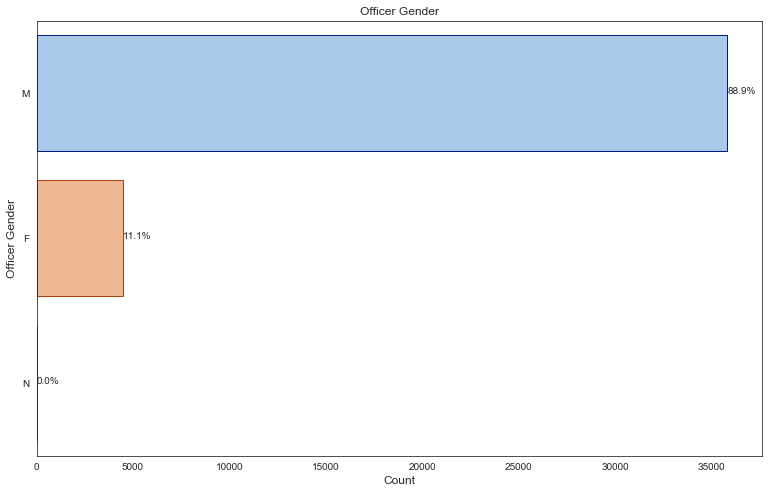

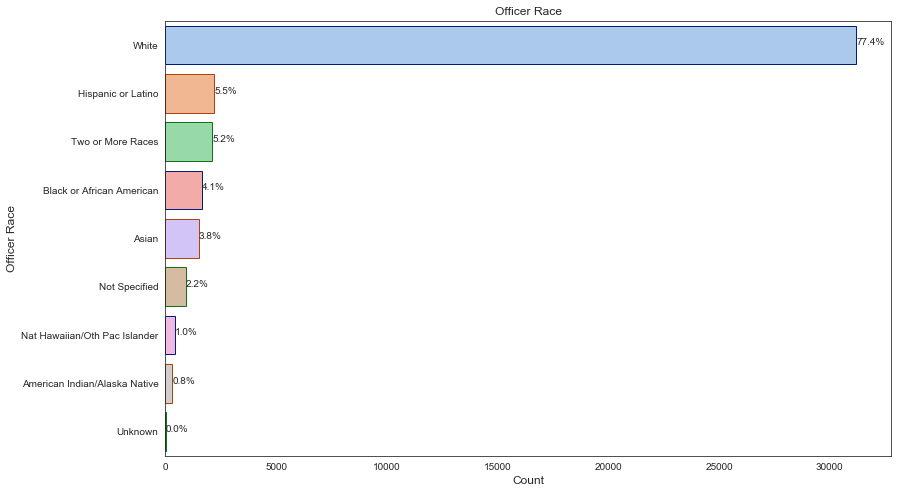

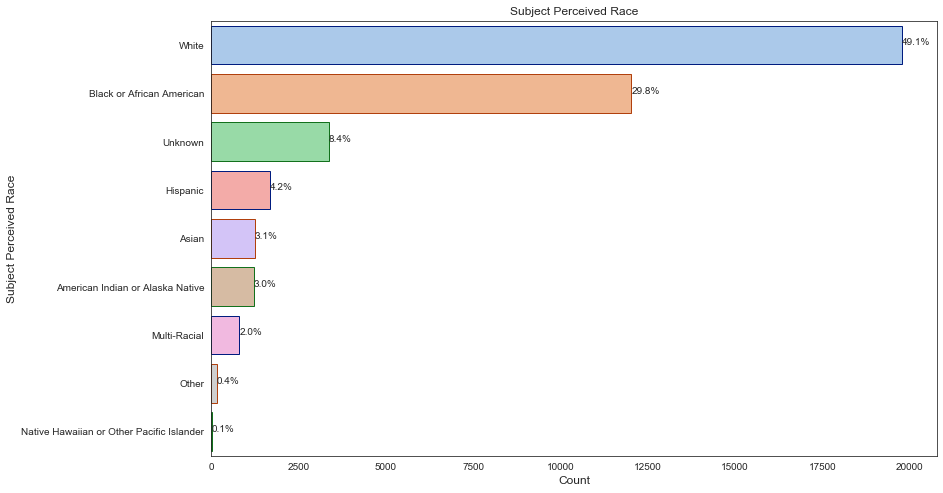

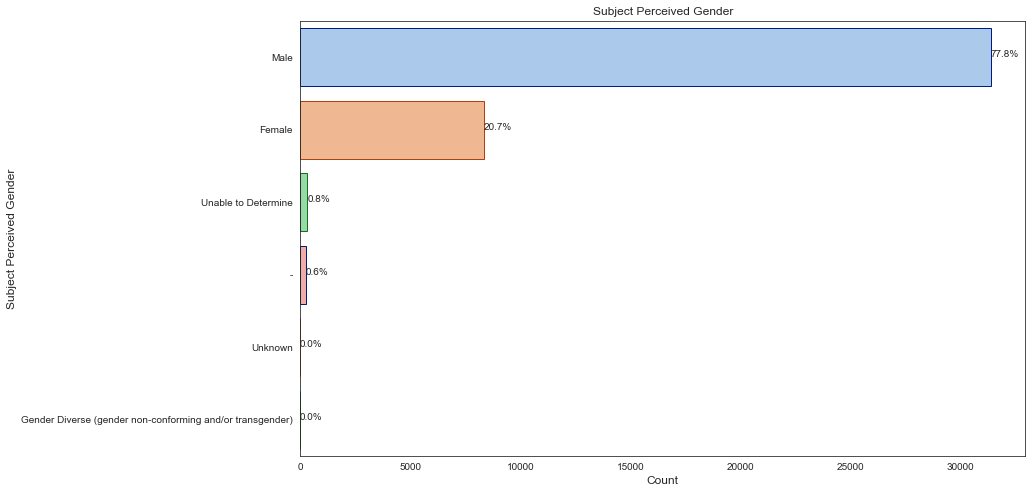

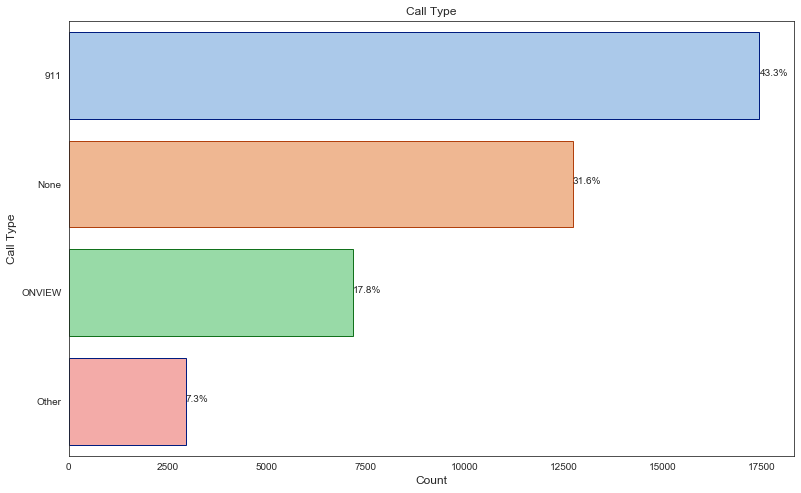

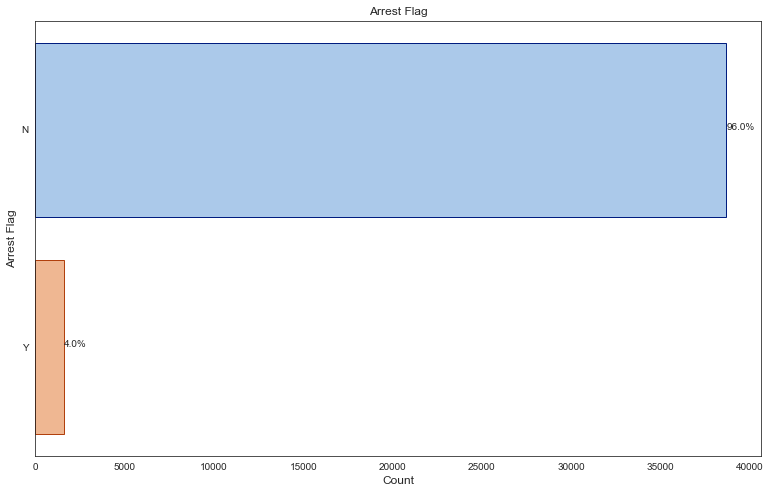

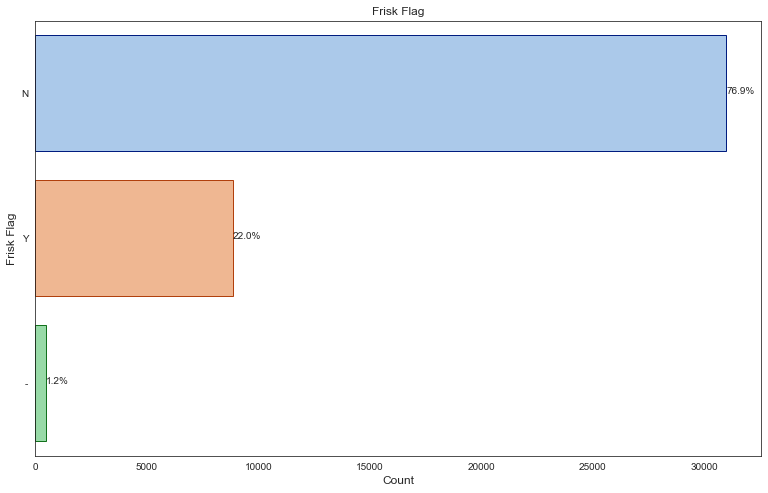

In [90]:
for col in df.drop(columns=['go_/_sc_num', 'terry_stop_id', 'officer_id', 'subject_id', 'reported_date',
                            'officer_squad', 'officer_yob', 'precinct', 'sector', 'beat', 'final_call_type', 
                            'initial_call_type', 'reported_time']).columns:
    ax = sns.countplot(y=col, data=df, edgecolor=sns.color_palette("dark", 3), palette='pastel',
                  order = df[col].value_counts().index);
    total = len(df[col])
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    title = col.replace('_', ' ').title()
    plt.title(title)
    plt.ylabel(title, fontsize=12)
    plt.xlabel('Count',fontsize=12)
    plt.show()